In [18]:
'''
使用 BDdys503.20190528.csv 進行模型建構 Svesson model 
when : 2019-08-10 
what : svesson model , least square and etc
where : 
who : Dr.ctlin , Boon hong
why : 
how : python

csv 資料内容説明
報表說明：							
1.存續期間以理論價格為計算基礎							
2.報價所提供之價格，為等殖成交系統中之收盤最佳公開報價							
3.成交價為等殖成交系統公開報價成交之成交量加權平均							
4.理論價以本中心計算之零息殖利率曲線(Steeley Cubic B-Spline Model)，推算出之理論價格							

'''

'\n使用 BDdys503.20190528.csv 進行模型建構 Svesson model \nwhen : 2019-08-10 \nwhat : svesson model , least square and etc\nwhere : \nwho : Dr.ctlin , Boon hong\nwhy : \nhow : python\n\ncsv 資料内容説明\n報表說明：\t\t\t\t\t\t\t\n1.存續期間以理論價格為計算基礎\t\t\t\t\t\t\t\n2.報價所提供之價格，為等殖成交系統中之收盤最佳公開報價\t\t\t\t\t\t\t\n3.成交價為等殖成交系統公開報價成交之成交量加權平均\t\t\t\t\t\t\t\n4.理論價以本中心計算之零息殖利率曲線(Steeley Cubic B-Spline Model)，推算出之理論價格\t\t\t\t\t\t\t\n\n'

In [144]:
import pandas as pd
import numpy as np
import math as m
import QuantLib as ql
import matplotlib.pyplot as pt 
from matplotlib import style
style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [120]:
df = pd.read_csv('data/BDdys503.20190528.csv')

In [121]:
''' variable explanation
bc : bond code
bn : bond name
md : maturity time
ttm : time to maturity
duration : duration
cr % : coupon rate  , unit = % 
m : coupon frequency
ty % : theoretical yield , unit = % 
tn : theoretical bond price
'''
df = df[['bc','bn','md','ttm','duration','cr %','m','ty %','tn']]
df = df.sort_values('ttm')
df['m'] = 1
print(df.head())

for i in np.arange(df['md'].shape[0]):
    ''' 程式流程
    m 為日期 以 / 作爲分割 
    0 year example :102 + 1911 = 等於西元日期
    1 month example : 06 取整數 6   
    2 day example : 15 取 整數
    '''
    m = str(df['md'][i]).split('/')
    year = int(float(m[0]) + 1911)
    month = int(m[1])
    day = int(m[2])
    date = ql.Date(day,month,year)
    df['md'][i] = "%d-%d-%d"%(date.dayOfMonth(),date.month(),date.year())

    df['zero rate bond price'] = np.zeros(df.shape[0])

for i in range(df.shape[0]):
    df['zero rate bond price'][i] = f(df['ty %'][i]/100,df['duration'][i])
'''
zr : zero rate , unit = %
zero rate bond price : custom count bond price , function is lambda y , t : 100 * m.exp(-y*t) 
conclusion , tn isn't zero rete bond , the bond is over price , so zero rate bond price is under face value now .. 
'''

         bc       bn         md   ttm  duration   cr %  m    ty %        tn
28   A03109  103央債甲9  108/06/27  0.08      0.08  1.125  1  0.4802  100.0491
29   A03110  103央甲10  108/07/18  0.13      0.13  1.125  1  0.4777  100.0864
63   A06107  106央債甲7  108/07/27  0.16      0.16  0.500  1  0.4774  100.0034
110  A98106   98央債甲6  108/09/09  0.28      0.28  1.375  1  0.4775  100.2494
34   A03115  103央甲15  108/10/15  0.38      0.38  1.250  1  0.4785  100.2900


C:\Users\HP T\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\HP T\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


"\nzr : zero rate , unit = %\nzero rate bond price : custom count bond price , function is lambda y , t : 100 * m.exp(-y*t) \nconclusion , tn isn't zero rete bond , the bond is over price , so zero rate bond price is under face value now .. \n"

In [127]:
print(df.head())

         bc       bn          md   ttm  duration   cr %    m    ty %  \
28   A03109  103央債甲9   27-6-2019  0.08      0.08  1.125  0.0  0.4802   
29   A03110  103央甲10   18-7-2019  0.13      0.13  1.125  0.0  0.4777   
63   A06107  106央債甲7   27-7-2019  0.16      0.16  0.500  0.0  0.4774   
110  A98106   98央債甲6    9-9-2019  0.28      0.28  1.375  0.0  0.4775   
34   A03115  103央甲15  15-10-2019  0.38      0.38  1.250  0.0  0.4785   

           tn  zero rate bond price  
28   100.0491             99.962066  
29   100.0864             99.938685  
63   100.0034             99.924589  
110  100.2494             99.868040  
34   100.2900             99.820580  


In [126]:
df['m'] = np.trunc(df['ttm'])

In [131]:
r = lambda duration , face , bondprice : -(1/duration) * np.log(bondprice/face) * 100
df['zera rate %']= r(df['duration'],100.0,df['zero rate bond price'])

In [132]:
print(df.head())

         bc       bn          md   ttm  duration   cr %    m    ty %  \
28   A03109  103央債甲9   27-6-2019  0.08      0.08  1.125  0.0  0.4802   
29   A03110  103央甲10   18-7-2019  0.13      0.13  1.125  0.0  0.4777   
63   A06107  106央債甲7   27-7-2019  0.16      0.16  0.500  0.0  0.4774   
110  A98106   98央債甲6    9-9-2019  0.28      0.28  1.375  0.0  0.4775   
34   A03115  103央甲15  15-10-2019  0.38      0.38  1.250  0.0  0.4785   

           tn  zero rate bond price  zera rate  zera rate %  
28   100.0491             99.962066   0.004743     0.474259  
29   100.0864             99.938685   0.004718     0.471796  
63   100.0034             99.924589   0.004715     0.471500  
110  100.2494             99.868040   0.004716     0.471597  
34   100.2900             99.820580   0.004726     0.472581  


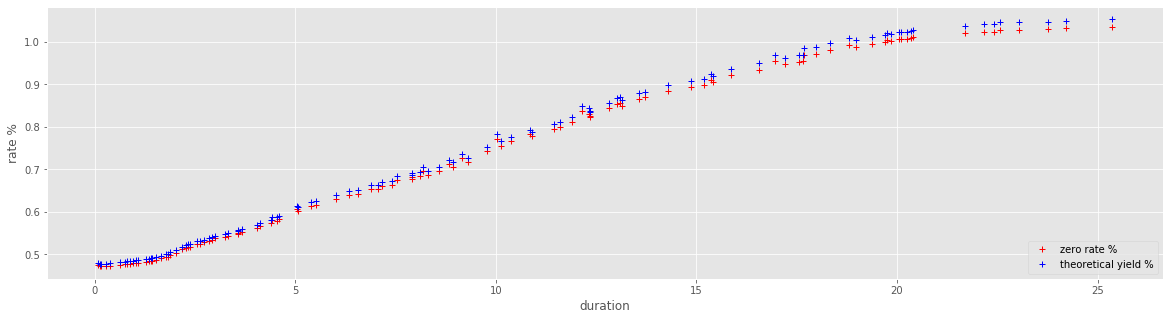

In [146]:
rcParams['figure.figsize'] = 20, 5
pt.plot(df.duration,df['zera rate %'],'r+',label = 'zero rate %')
pt.plot(df.duration,df['ty %'],'b+',label = 'theoretical yield %')
pt.xlabel('duration')
pt.ylabel('rate %')
pt.legend(loc= 'lower right')

In [149]:
t = np.array(df['duration'])
y = np.array(df['zera rate %'])

In [184]:
'''
linear least square
'''
# print(yi)

from scipy.optimize import leastsq
from scipy.optimize import fmin_cg
from scipy.optimize import least_squares

def svensson_exp_tau(tau,t):  
    return ( 1 - np.exp( -(t / tau) ) ) / ( t / tau)

def n_svensson_model(params, t):
    b0,b1,b2,b3,tau1,tau2 = params 
    svensson = b0 +\
    b1 * svensson_exp_tau(tau1,t) +\
    b2 *( svensson_exp_tau(tau1,t) - np.exp( -(t/tau1) ) ) +\
    b3 *( svensson_exp_tau(tau2,t) - np.exp(-(t/tau2)) )
    return svensson

def error(params , t , y):
    return y - n_svensson_model(params,t)

def jac(params, t, yi):
    J = np.empty((t.size, params.size))
    J[:, 0] = 1.0
    J[:, 1] = svensson_exp_tau(params[4],t)
    J[:, 2] = svensson_exp_tau(params[4],t) - np.exp( -(t/params[4]) )
    J[:, 3] = svensson_exp_tau(params[5],t) - np.exp( -(t/params[5]) )
    J[:, 4] = (params[1]/t) * (1 - ( np.exp(-t/params[4]) + np.exp(-t/params[4]) * t / params[4] ) ) + params[2] *  ( ( 1- np.exp(-t/params[4]) )/t - np.exp(-t/params[4]) * (1/params[4] + t/(params[4] **2 )) )
    J[:, 5] = params[3] *  ( ( 1- np.exp(-t/params[5]) )/t - np.exp(-t/params[5]) * (1/params[5] + t/(params[5] **2 )) )
    return J

po = np.array([0.02, -0.01, -0.01, 0, 2 , 2])

params = leastsq(error , po , args=(t,y))
res = least_squares(error, po, jac=jac , args=(t, y), verbose=1)
# res2 = fmin_cg(error, po, fprime=jac, args=(t,y))
# res2 = minimize(error, po ,jac=jac, args=(t,y) ,method='CG')

params = params[0]

'''
show parameter
'''
par = "b0,b1,b2,b3,tau1,tau2".split(',')
for i in range(po.size) :
    print('參數 %s , linear least sq 估計 %s , non linear least sq %s '%(par[i]  , params[i] , res.x[i]  ) )

df['svesson model linear least square zero rate %'] = n_svensson_model(params,t)
df['svesson model non linear least square zero rate %'] = n_svensson_model(res.x,t)
# df['svesson model non linear cg zero rate %'] = n_svensson_model(res2.x,t)

`xtol` termination condition is satisfied.
Function evaluations 16, initial cost 3.1454e+01, final cost 3.1454e+01, first-order optimality 8.28e+01.
參數 b0 , linear least sq 估計 -9.439398277563665 , non linear least sq 0.02 
參數 b1 , linear least sq 估計 9.965068299739979 , non linear least sq -0.01 
參數 b2 , linear least sq 估計 -121.33623975115324 , non linear least sq -0.01 
參數 b3 , linear least sq 估計 -0.2687576704040104 , non linear least sq 0.0 
參數 tau1 , linear least sq 估計 -2727.4763769364718 , non linear least sq 2.0 
參數 tau2 , linear least sq 估計 0.7287337317984145 , non linear least sq 2.0 


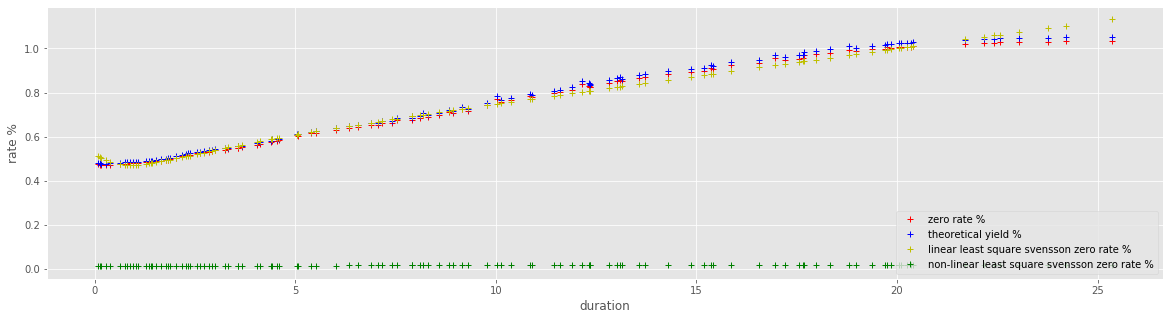

In [177]:
rcParams['figure.figsize'] = 20, 5
pt.plot(df.duration,df['zera rate %'],'r+',label = 'zero rate %')
pt.plot(df.duration,df['ty %'],'b+',label = 'theoretical yield %')
pt.plot(df.duration,df['svesson model linear least square zero rate %'],'y+',label = 'linear least square svensson zero rate %')
pt.plot(df.duration,df['svesson model non linear least square zero rate %'],'g+',label = 'non-linear least square svensson zero rate %')
pt.xlabel('duration')
pt.ylabel('rate %')
pt.legend(loc= 'lower right')
pt.show()

In [119]:
'''
驗證  c = y , p = f 
'''

bp = lambda c , y , n ,f : (c*f/y) * (1 - ((1+y)**n) ) + f / (1+y)**n 
''' 變數解釋
c : coupon rate 
y : yield rate 
n : time to maturity
f : face value 
'''
bp(0.08,0.02,0,100.0)

bondp = lambda c , f, y , m , d , d1 : (c*f/y) * (1 - ((1+y)**n) ) + f / (1+y)**n
''' 變數解釋
m : frequency 
d :  前次與下次付息日實際天數
d1 : 交割日到下次付息日實際天數
'''

100.0

In [111]:
import math as m
f = lambda bp , t : -(1/t) * (m.log(bp/100.0)) * 100

''' variable explanation 
bp : bond price
t : duration (if i using duration , that means the bond does't has coupon)
'''
f(97.5,0.25)
f = lambda y , t : 100 * m.exp(-y*t)
f(0.101271 , 0.25)

f

10.12712319371596

In [24]:
print(df.head())

         bc       bn         md   ttm  duration   cr %  m    ty %        tn  \
28   A03109  103央債甲9  108/06/27  0.08      0.08  1.125  1  0.4802  100.0491   
29   A03110  103央甲10  108/07/18  0.13      0.13  1.125  1  0.4777  100.0864   
63   A06107  106央債甲7  108/07/27  0.16      0.16  0.500  1  0.4774  100.0034   
110  A98106   98央債甲6  108/09/09  0.28      0.28  1.375  1  0.4775  100.2494   
34   A03115  103央甲15  108/10/15  0.38      0.38  1.250  1  0.4785  100.2900   

     zero rate bond price  
28              99.961591  
29              99.937918  
63              99.923645  
110             99.866389  
34              99.818335  


In [31]:
print(df.tail())

      ttm  duration   cr %  m    ty %        tn  zero rate bond price
62  27.99     22.41  1.875  1  1.0412  120.1531             79.188989
67  28.49     23.04  1.625  1  1.0459  114.2019             78.586099
71  28.97     23.77  1.500  1  1.0482  111.2362             77.945748
77  29.45     24.22  1.375  1  1.0501  108.1912             77.543259
84  29.97     25.37  1.125  1  1.0533  101.8328             76.550295


In [186]:
'''
testing pca  
'''
df = df.drop(['bc','bn','md'],axis=1)
print(df.head())

      ttm  duration   cr %    m    ty %        tn  zero rate bond price  \
28   0.08      0.08  1.125  0.0  0.4802  100.0491             99.962066   
29   0.13      0.13  1.125  0.0  0.4777  100.0864             99.938685   
63   0.16      0.16  0.500  0.0  0.4774  100.0034             99.924589   
110  0.28      0.28  1.375  0.0  0.4775  100.2494             99.868040   
34   0.38      0.38  1.250  0.0  0.4785  100.2900             99.820580   

     zera rate  zera rate %  svesson model zero rate %  \
28    0.004743     0.474259                   0.513880   
29    0.004718     0.471796                   0.507496   
63    0.004715     0.471500                   0.504000   
110   0.004716     0.471597                   0.492279   
34    0.004726     0.472581                   0.484938   

     svesson model linear least square zero rate %  \
28                                        0.513880   
29                                        0.507496   
63                                    

In [187]:
factor_cor = np.corrcoef(df)
print(factor_cor)

from sklearn.preprocessing import StandardScaler
factors = StandardScaler().fit_transform(factor_cor)
# '''scaler '''

[[1.         0.99999981 0.99998854 ... 0.92679312 0.92410626 0.92077495]
 [0.99999981 1.         0.99998907 ... 0.92698292 0.92429653 0.92096713]
 [0.99998854 0.99998907 1.         ... 0.92729058 0.92462983 0.92134707]
 ...
 [0.92679312 0.92698292 0.92729058 ... 1.         0.99981201 0.99859787]
 [0.92410626 0.92429653 0.92462983 ... 0.99981201 1.         0.99940039]
 [0.92077495 0.92096713 0.92134707 ... 0.99859787 0.99940039 1.        ]]


'scaler '

In [188]:
from sklearn.decomposition import PCA as pca

for i in range(4):
    p = pca(n_components=(i+1))
    results  = p.fit_transform(factors)
    results.shape
    print("i = %s   proportion >>  %s "%((i+1) , (p.explained_variance_ratio_)))
    print("Cumulative Proportion >> %s \n"%str(sum(p.explained_variance_ratio_)) )
print('因爲都低於95%所以代表每個因子都重要(對於解釋模型)')

i = 1   proportion >>  [0.71975833] 
Cumulative Proportion >> 0.7197583251462661 

i = 2   proportion >>  [0.71975833 0.27492505] 
Cumulative Proportion >> 0.99468337463431 

i = 3   proportion >>  [0.71975833 0.27492505 0.00531295] 
Cumulative Proportion >> 0.9999963269286747 

i = 4   proportion >>  [7.19758325e-01 2.74925049e-01 5.31295229e-03 3.49985579e-06] 
Cumulative Proportion >> 0.9999998267844642 

因爲都低於95%所以代表每個因子都重要(對於解釋模型)


In [190]:
for i in range(2):
    p = pca(n_components=(2))
    results  = p.fit_transform(factors)
    results.shape
    print("i = %s   proportion >>  %s "%((i+1) , (p.explained_variance_ratio_)))
    print("Cumulative Proportion >> %s \n"%str(sum(p.explained_variance_ratio_)) )

i = 1   proportion >>  [0.71975833 0.27492505] 
Cumulative Proportion >> 0.99468337463431 

i = 2   proportion >>  [0.71975833 0.27492505] 
Cumulative Proportion >> 0.99468337463431 



In [191]:
p.explained_variance_ratio_

array([0.71975833, 0.27492505])